In [ ]:
from sklearn.model_selection import train_test_split
from __future__ import division
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

## Загрузка данных



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
data = pd.read_csv('data.csv', sep = ';',error_bad_lines=False)


##Обработка данных

In [ ]:
Data = data.dropna()

In [ ]:
Data.apply(pd.to_numeric,errors='coerce')

,R,G,I,N,D,S,Index
2,0.05,0.00,0.67,-0.60,0.19,58.90,3.0
3,-0.01,0.02,0.03,0.11,0.00,0.04,3.0
4,-0.01,0.35,0.00,0.00,0.07,0.06,3.0
5,0.08,0.72,0.13,0.10,-0.13,0.14,2.0
6,0.07,1.07,0.03,0.04,0.13,0.04,3.0
...,...,...,...,...,...,...,...
158,0.43,0.67,0.14,0.85,0.93,0.39,3.0
159,0.11,0.07,0.02,0.05,0.05,0.02,2.0
160,1.15,0.00,0.02,0.98,1.08,0.37,1.0
161,0.06,0.02,0.02,0.04,0.04,0.04,2.0


In [ ]:
Data.head()

,R,G,I,N,D,S,Index
2,0.05,0.00,0.67,-0.60,0.19,58.90,3.0
3,-0.01,0.02,0.03,0.11,0.00,0.04,3.0
4,-0.01,0.35,0.00,0.00,0.07,0.06,3.0
5,0.08,0.72,0.13,0.10,-0.13,0.14,2.0
6,0.07,1.07,0.03,0.04,0.13,0.04,3.0


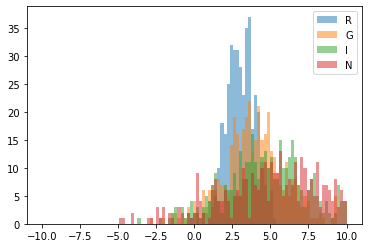

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 

x = [random.gauss(3,1) for R in range(400)] 
y = [random.gauss(4,2) for G in range(400)] 
z = [random.gauss(5,3) for I in range(400)]
m = [random.gauss(6,4) for N in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='R') 
pyplot.hist(y, bins, alpha=0.5, label='G') 
pyplot.hist(z, bins, alpha=0.5, label='I')
pyplot.hist(m, bins, alpha=0.5, label='N')
pyplot.legend(loc='upper right') 
pyplot.show()

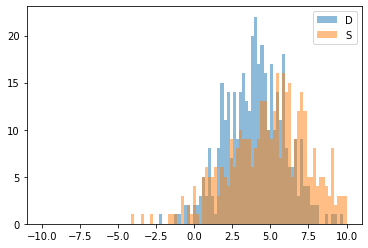

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 

y = [random.gauss(4,2) for D in range(400)] 
z = [random.gauss(5,3) for S in range(400)]

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(y, bins, alpha=0.5, label='D') 
pyplot.hist(z, bins, alpha=0.5, label='S')
pyplot.legend(loc='upper right') 
pyplot.show()

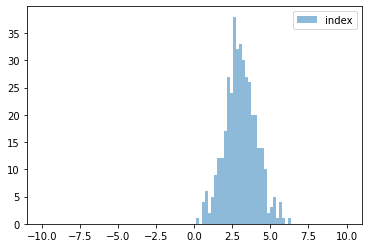

In [ ]:
import random 
import numpy 
from matplotlib import pyplot 
				
x = [random.gauss(3,1) for index in range(400)] 

bins = numpy.linspace(-10, 10, 100) 

pyplot.hist(x, bins, alpha=0.5, label='index') 

pyplot.legend(loc='upper right') 
pyplot.show()

In [ ]:
y = Data['Index'].values
x = Data.iloc[:, 0:6]
print(x)

        R     G     I     N     D      S
2    0.05  0.00  0.67 -0.60  0.19  58.90
3   -0.01  0.02  0.03  0.11  0.00   0.04
4   -0.01  0.35  0.00  0.00  0.07   0.06
5    0.08  0.72  0.13  0.10 -0.13   0.14
6    0.07  1.07  0.03  0.04  0.13   0.04
..    ...   ...   ...   ...   ...    ...
158  0.43  0.67  0.14  0.85  0.93   0.39
159  0.11  0.07  0.02  0.05  0.05   0.02
160  1.15  0.00  0.02  0.98  1.08   0.37
161  0.06  0.02  0.02  0.04  0.04   0.04
162  0.05  0.00  0.06 -0.01  0.01   0.06

[142 rows x 6 columns]


In [ ]:
print(y)

[3. 3. 3. 2. 3. 2. 2. 3. 3. 3. 3. 1. 2. 2. 2. 1. 2. 3. 3. 2. 1. 1. 2. 3.
 3. 3. 3. 3. 1. 3. 3. 3. 3. 2. 1. 3. 3. 3. 3. 3. 3. 1. 2. 2. 3. 3. 3. 3.
 2. 2. 2. 1. 3. 3. 2. 3. 3. 1. 3. 3. 3. 2. 2. 3. 3. 3. 1. 3. 1. 2. 3. 3.
 1. 3. 1. 3. 3. 3. 3. 3. 1. 2. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 2. 2. 3.
 3. 2. 3. 1. 1. 3. 2. 2. 2. 1. 1. 3. 3. 3. 3. 1. 3. 2. 3. 2. 1. 1. 3. 3.
 1. 2. 1. 1. 3. 3. 1. 3. 3. 3. 1. 3. 3. 2. 3. 3. 1. 3. 2. 1. 2. 2.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/5, random_state = 0)

In [ ]:
train = [(x_train), (y_train)]
test = [(x_test), (y_test)]

In [ ]:
Data.loc[Data.Index == 2,]

,R,G,I,N,D,S,Index
5,0.08,0.72,0.13,0.10,-0.13,0.14,2.0
7,0.24,0.15,0.02,0.20,0.20,0.66,2.0
8,0.96,1.26,0.01,0.96,0.91,0.32,2.0
15,0.48,0.69,0.04,0.52,0.39,0.04,2.0
16,0.10,0.23,0.18,-0.09,-0.21,0.24,2.0
17,2.16,11.26,0.03,1.66,0.09,0.03,2.0
20,0.45,0.94,0.00,0.38,0.29,0.13,2.0
23,0.42,1.01,0.00,0.35,0.42,0.15,2.0
26,0.13,1.35,0.02,0.15,0.10,0.27,2.0
44,0.30,0.31,0.11,0.19,0.19,0.33,2.0


In [ ]:
print(y_train)

[3. 3. 3. 3. 3. 2. 2. 2. 2. 1. 3. 3. 1. 3. 1. 3. 2. 3. 1. 3. 3. 3. 3. 2.
 1. 2. 2. 2. 2. 3. 3. 2. 1. 3. 3. 3. 2. 3. 2. 2. 2. 1. 1. 3. 3. 1. 3. 3.
 1. 2. 3. 3. 3. 2. 3. 1. 3. 3. 2. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 1. 3. 2.
 1. 1. 3. 3. 1. 2. 3. 2. 3. 2. 3. 1. 1. 3. 2. 3. 2. 1. 1. 2. 1. 3. 1. 3.
 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 2. 3. 1. 3.]


##Основные методы классификации до объединения в ансамбли


1.   Метод ближайших соседей - kNN
2.   Наивный Байесовский классификатор - NB
3.   Метод опорных векторов - SVM
4.   Logistic Regression - LR  - только для бинарной классификации
нужно найти для множественной классификации
5.   Линейный дискриминантный анализ - LDA
6.   Классификатор дерева решений - DTC (потом объединим в Random forest)

+ там еще рэндом форест и нейронки с сайта



##1. Метод ближайших соседей - kNN

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=4 ) 

In [ ]:
knn_clf.fit(x_train, y_train) #обучаем классификатор

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
Knn_pred = knn_clf.predict(x_test)

In [ ]:
print(Knn_pred)

[3. 1. 2. 3. 3. 3. 3. 1. 3. 1. 1. 1. 3. 1. 1. 3. 3. 2. 3. 3. 3. 3. 3. 3.
 2. 1. 1. 1. 3.]


In [ ]:
round(knn_clf.score(x_test, y_test),3)

0.724

In [ ]:
round(knn_clf.score(x_train,y_train),3)

0.743

In [ ]:
#Оценим точность классификатора
print(accuracy_score(Knn_pred, y_test))

0.7241379310344828


In [ ]:
#Матрица неточности
print(confusion_matrix(Knn_pred, y_test))

[[ 5  2  3]
 [ 0  2  1]
 [ 0  2 14]]


In [ ]:
#Отчет о классификации для тестовой выборки
print(classification_report(Knn_pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.50      0.67        10
         2.0       0.33      0.67      0.44         3
         3.0       0.78      0.88      0.82        16

    accuracy                           0.72        29
   macro avg       0.70      0.68      0.64        29
weighted avg       0.81      0.72      0.73        29



In [ ]:
#Отчет о классификации для тренировочной выборки
Knn_pred1 = knn_clf.predict(x_train)
print(classification_report(Knn_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.84      0.68      0.75        31
         2.0       0.67      0.67      0.67        27
         3.0       0.74      0.82      0.78        55

    accuracy                           0.74       113
   macro avg       0.75      0.72      0.73       113
weighted avg       0.75      0.74      0.74       113



In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_std, y_train)

knn.predict_proba([X_test_std[0,:]])

array([[0., 0., 1.]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании к третьему классу(Понци) 







---



##Посмотрим влияние показателей

In [ ]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     |████████████████████████████████| 112kB 2.7MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [ ]:
f_knn = PermutationImportance(knn_clf, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_knn)

Weight,Feature
0.0035 ± 0.0470,x4
-0.0071 ± 0.0394,x3
-0.0159 ± 0.0132,x2
-0.0248 ± 0.0564,x0
-0.0301 ± 0.0397,x5
-0.0903 ± 0.0283,x1


In [ ]:
importance_knn=f_knn.feature_importances_

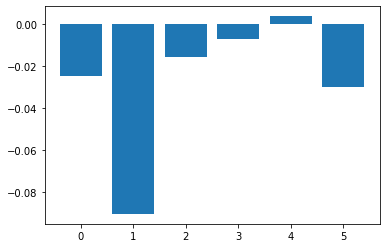

In [ ]:
pyplot.bar([x for x in range(len(importance_knn))], importance_knn)
pyplot.show()

Мы видим, что наибольшее влияние имеет размер инвестиций, а наименьшее размер дивидендов

##2.   Наивный Байесовский классификатор - NB


Почему не стоит применять для ансамбля?
Следует отметить, что в случае НБА использование ансамблевых методов, таких как бэггинг (bagging) и бустинг (boosting), не дает результатов. Данные подходы направлены на уменьшение дисперсии, что неприменимо по отношению к НБА.


In [ ]:
NB_clf = GaussianNB() #вроде для мультикласса отдельных параметров нет

In [ ]:
NB_clf.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_pred = NB_clf.predict(x_test)

In [ ]:
print(NB_pred)

[3. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 1. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 1.
 2. 2. 2. 2. 3.]


In [ ]:
round(NB_clf.score(x_test,y_test),3)

0.379

In [ ]:
round(NB_clf.score(x_train,y_train),3)

0.363

In [ ]:
#Оценим точность классификатора
print(accuracy_score(NB_pred, y_test))

0.3793103448275862


In [ ]:
#Матрица неточности
print(confusion_matrix(NB_pred, y_test))

[[ 1  0  1]
 [ 4  6 13]
 [ 0  0  4]]


In [ ]:
#Отчет о классификации
print(classification_report(NB_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.20      0.50      0.29         2
         2.0       1.00      0.26      0.41        23
         3.0       0.22      1.00      0.36         4

    accuracy                           0.38        29
   macro avg       0.47      0.59      0.35        29
weighted avg       0.84      0.38      0.40        29



In [ ]:
#Отчет о классификации для тренировочной выборки
NB_pred1 = NB_clf.predict(x_train)
print(classification_report(NB_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.16      0.80      0.27         5
         2.0       1.00      0.28      0.43        98
         3.0       0.16      1.00      0.28        10

    accuracy                           0.36       113
   macro avg       0.44      0.69      0.33       113
weighted avg       0.89      0.36      0.41       113



In [ ]:
nb = GaussianNB()
nb.fit(X_train_std, y_train)

nb.predict_proba([X_test_std[0,:]])

array([[2.96957681e-10, 5.09129101e-15, 1.00000000e+00]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании к третьему классу(Понци) 







---



##Посмотрим влияние показателей

In [ ]:
f_NB = PermutationImportance(NB_clf, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_NB)

Weight,Feature
0.0230 ± 0.0240,x4
0.0195 ± 0.0071,x2
0.0177 ± 0.0250,x0
0.0088 ± 0.0158,x3
-0.0018 ± 0.0206,x5
-0.0106 ± 0.0071,x1


In [ ]:
importance_NB=f_NB.feature_importances_

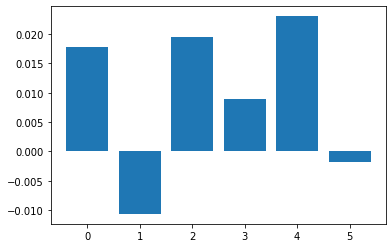

In [ ]:
pyplot.bar([x for x in range(len(importance_NB))], importance_NB)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли, дивидендов и процентных платежей

##3.   Мультиклассовый метод опорных векторов - SVM



In [ ]:
#c другого сайта http://scikit-learn.org/stable/modules/multiclass.html 
svm = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2,random_state=0)

In [ ]:
svm_pred=svm.fit(x_train,y_train).predict(x_test)

In [ ]:
print(svm_pred)

[3. 1. 2. 3. 2. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 1. 3.]


In [ ]:
round(svm.score(x_test,y_test),3)

0.828

In [ ]:
round(svm.score(x_train,y_train),3)

0.717

In [ ]:
#Оценим точность классификатора
print(accuracy_score(svm_pred, y_test))

0.8275862068965517


In [ ]:
#Матрица неточности
print(confusion_matrix(svm_pred, y_test))

[[ 4  0  0]
 [ 0  2  0]
 [ 1  4 18]]


In [ ]:
#Отчет о классификации
print(classification_report(svm_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.80      1.00      0.89         4
         2.0       0.33      1.00      0.50         2
         3.0       1.00      0.78      0.88        23

    accuracy                           0.83        29
   macro avg       0.71      0.93      0.76        29
weighted avg       0.93      0.83      0.85        29



In [ ]:
#Отчет о классификации для тренировочной выборки
svm_pred1 = svm.predict(x_train)
print(classification_report(svm_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.64      0.76      0.70        21
         2.0       0.30      0.89      0.44         9
         3.0       0.93      0.69      0.79        83

    accuracy                           0.72       113
   macro avg       0.62      0.78      0.64       113
weighted avg       0.83      0.72      0.75       113



##Посмотрим влияние показателей

In [ ]:
f_svm = PermutationImportance(svm, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_svm)

Weight,Feature
-0.0018 ± 0.0071,x2
-0.0053 ± 0.0180,x5
-0.0354 ± 0.0158,x4
-0.0496 ± 0.0364,x0
-0.0549 ± 0.0586,x3
-0.0761 ± 0.0142,x1


In [ ]:
importance_svm=f_svm.feature_importances_

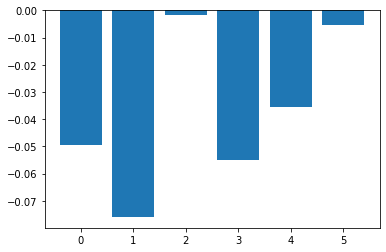

In [ ]:
pyplot.bar([x for x in range(len(importance_svm))], importance_svm)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

##4.   Logistic Regression - LR  



In [ ]:
LR_clf = LogisticRegression(random_state=0, solver="lbfgs", multi_class = "multinomial")

In [ ]:
LR_clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_pred = LR_clf.predict(x_test)

In [ ]:
round(LR_clf.score(x_test, y_test), 3)

0.759

In [ ]:
round(LR_clf.score(x_train,y_train),3)

0.69

In [ ]:
print(LR_pred)

[3. 1. 2. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(LR_pred, y_test))

0.7586206896551724


In [ ]:
#Матрица неточности
print(confusion_matrix(LR_pred, y_test))

[[ 3  0  0]
 [ 0  1  0]
 [ 2  5 18]]


In [ ]:
#Отчет о классификации
print(classification_report(LR_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75         3
         2.0       0.17      1.00      0.29         1
         3.0       1.00      0.72      0.84        25

    accuracy                           0.76        29
   macro avg       0.59      0.91      0.62        29
weighted avg       0.93      0.76      0.81        29



In [ ]:
#Отчет о классификации для тренировочной выборки
LR_pred1 = LR_clf.predict(x_train)
print(classification_report(LR_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.56      0.82      0.67        17
         2.0       0.26      0.88      0.40         8
         3.0       0.93      0.65      0.77        88

    accuracy                           0.69       113
   macro avg       0.58      0.78      0.61       113
weighted avg       0.83      0.69      0.72       113



In [ ]:
LR_clf.predict_proba(x_test)

array([[7.74983244e-02, 7.06389023e-02, 8.51862773e-01],
       [7.53342637e-01, 1.50512390e-01, 9.61449729e-02],
       [5.92084353e-02, 5.38491471e-01, 4.02300094e-01],
       [2.87684669e-02, 3.89076634e-01, 5.82154899e-01],
       [8.76209942e-03, 4.77094437e-01, 5.14143463e-01],
       [2.05290597e-02, 3.89172321e-01, 5.90298619e-01],
       [5.52947747e-02, 8.48029715e-02, 8.59902254e-01],
       [2.49827078e-01, 2.35994162e-01, 5.14178760e-01],
       [2.50083137e-01, 2.36322715e-01, 5.13594148e-01],
       [2.92056968e-01, 2.33383559e-01, 4.74559473e-01],
       [2.59916113e-01, 2.44589100e-01, 4.95494786e-01],
       [9.99999950e-01, 4.96549942e-08, 1.68469856e-11],
       [1.27613896e-02, 7.97029273e-03, 9.79268318e-01],
       [3.25192056e-01, 2.14058486e-01, 4.60749458e-01],
       [8.33137942e-01, 7.53856176e-02, 9.14764404e-02],
       [1.87854130e-01, 3.06615771e-01, 5.05530099e-01],
       [2.02520813e-01, 1.03947247e-01, 6.93531940e-01],
       [1.92337168e-01, 2.43314

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

lr.predict_proba([X_test_std[0,:]])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[0.00170317, 0.12470473, 0.8735921 ]])

Feature: 0, Score: -1.77849
Feature: 1, Score: 0.68061
Feature: 2, Score: 0.15050
Feature: 3, Score: -0.70655
Feature: 4, Score: 1.24464
Feature: 5, Score: 0.45402


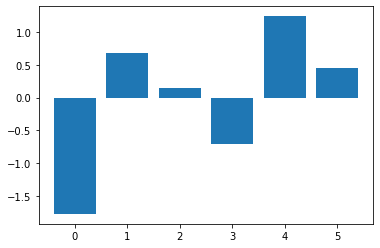

In [ ]:
# get importance
importance = LR_clf.coef_[2]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
При увеличении размера инвестиций, дивидендов(большее влияние) и процентных выплат вероятность отнести компанию к третьему классу (понци) увеличивается.
При увеличении операционной прибыли вероятность отнести компанию к третьему классу (понци) уменьшается.

In [ ]:
Data.head()

,R,G,I,N,D,S,Index
2,0.05,0.00,0.67,-0.60,0.19,58.90,3.0
3,-0.01,0.02,0.03,0.11,0.00,0.04,3.0
4,-0.01,0.35,0.00,0.00,0.07,0.06,3.0
5,0.08,0.72,0.13,0.10,-0.13,0.14,2.0
6,0.07,1.07,0.03,0.04,0.13,0.04,3.0


Интерпретация: модель предсказывает с шансом 87% принадлежность первой компании к третьему классу(Понци) и 13% ко второму (Спекулятивный)







---



##5.   Линейный дискриминантный анализ - LDA



In [ ]:
LDA_clf = LDA() 

In [ ]:
LDA_clf.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
LDA_pred=LDA_clf.predict(x_test)

In [ ]:
round(LDA_clf.score(x_test, y_test), 3)

0.655

In [ ]:
round(LDA_clf.score(x_train,y_train),3)

0.584

In [ ]:
print(LDA_pred)

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(LDA_pred, y_test))

0.6551724137931034


In [ ]:
#Матрица неточности
print(confusion_matrix(LDA_pred, y_test))

[[ 1  0  0]
 [ 0  0  0]
 [ 4  6 18]]


In [ ]:
#Отчет о классификации
print(classification_report(LDA_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.20      1.00      0.33         1
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.64      0.78        28

    accuracy                           0.66        29
   macro avg       0.40      0.55      0.37        29
weighted avg       0.97      0.66      0.77        29



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Отчет о классификации для тренировочной выборки
LDA_pred1 = LDA_clf.predict(x_train)
print(classification_report(LDA_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.12      1.00      0.21         3
         2.0       0.07      1.00      0.14         2
         3.0       1.00      0.56      0.72       108

    accuracy                           0.58       113
   macro avg       0.40      0.85      0.36       113
weighted avg       0.96      0.58      0.70       113



In [ ]:
lda = LDA()
lda.fit(X_train_std, y_train)

lda.predict_proba([X_test_std[0,:]])

array([[0.18793992, 0.20835242, 0.60370766]])

Интерпретация: модель предсказывает с шансом 60% принадлежность первой компании к третьему классу(Понци), 21% ко второму (Спекулятивный) и 19% к первому(Хеджевый)







---



##Посмотрим влияние показателей

In [ ]:
f_lda = PermutationImportance(LDA_clf, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_lda)

Weight,Feature
0 ± 0.0000,x5
0 ± 0.0000,x4
0 ± 0.0000,x2
-0.0053 ± 0.0142,x3
-0.0053 ± 0.0087,x0
-0.0071 ± 0.0132,x1


In [ ]:
importance_lda=f_lda.feature_importances_

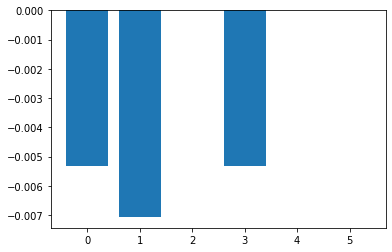

In [ ]:
pyplot.bar([x for x in range(len(importance_lda))], importance_lda)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

##6.   Классификатор дерева решений - DTC 


In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_pred = tree_clf.predict(x_test)

In [ ]:
round(tree_clf.score(x_test, y_test), 3)

0.655

In [ ]:
round(tree_clf.score(x_train,y_train),3)

1.0

In [ ]:
print(tree_pred)

[3. 1. 2. 3. 3. 3. 3. 2. 2. 3. 3. 1. 3. 3. 1. 3. 2. 3. 3. 3. 3. 2. 3. 3.
 3. 3. 3. 3. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(tree_pred, y_test))

0.6551724137931034


In [ ]:
#Матрица неточности
print(confusion_matrix(tree_pred, y_test))

[[ 3  0  0]
 [ 0  2  4]
 [ 2  4 14]]


In [ ]:
#Отчет о классификации
print(classification_report(tree_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75         3
         2.0       0.33      0.33      0.33         6
         3.0       0.78      0.70      0.74        20

    accuracy                           0.66        29
   macro avg       0.57      0.68      0.61        29
weighted avg       0.67      0.66      0.65        29



In [ ]:
#Отчет о классификации для тренировочной выборки
tree_pred1 = tree_clf.predict(x_train)
print(classification_report(tree_pred1, y_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        61

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)

tree.predict_proba([X_test_std[0,:]])

array([[0., 0., 1.]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании ко второму классу (Спекулятивный)







---



Feature: 0, Score: 0.28527
Feature: 1, Score: 0.23305
Feature: 2, Score: 0.02937
Feature: 3, Score: 0.07726
Feature: 4, Score: 0.18222
Feature: 5, Score: 0.19282


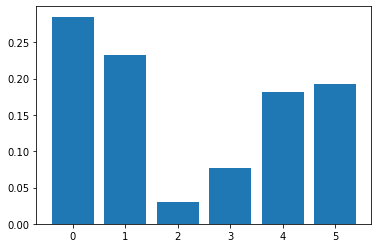

In [ ]:
importance_DT = tree_clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_DT):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_DT))], importance_DT)
pyplot.show()

Мы видим, что в большей степени на результат классификации влияет размер операционной прибыли и инвестиций.
В меньшей степени влияют процентные выплаты.

АНСАМБЛИ
#Random forest 



In [ ]:
RF = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt", max_depth=10, random_state=0).fit(x_train, y_train)


In [ ]:
RF_pred = RF.predict(x_test)


In [ ]:
round(RF.score(x_test, y_test), 3)


0.793

In [ ]:
round(RF.score(x_train,y_train),3)

1.0

In [ ]:
print(RF_pred)

[3. 1. 2. 3. 3. 3. 3. 3. 3. 1. 3. 1. 3. 1. 1. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 1. 3.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(RF_pred, y_test))

0.7931034482758621


In [ ]:
#Матрица неточности
print(confusion_matrix(RF_pred, y_test))

[[ 5  0  1]
 [ 0  1  0]
 [ 0  5 17]]


In [ ]:
#Отчет о классификации
print(classification_report(RF_pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.83      0.91         6
         2.0       0.17      1.00      0.29         1
         3.0       0.94      0.77      0.85        22

    accuracy                           0.79        29
   macro avg       0.70      0.87      0.68        29
weighted avg       0.93      0.79      0.84        29



In [ ]:
#Отчет о классификации для тренировочной выборки
RF_pred1 = RF.predict(x_train)
print(classification_report(RF_pred1, y_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        61

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



In [ ]:
rf = RandomForestClassifier(n_estimators=100, bootstrap=True, max_features="sqrt", max_depth=10, random_state=0)
rf.fit(X_train_std, y_train)

rf.predict_proba([X_test_std[0,:]])

array([[0.05, 0.46, 0.49]])

Интерпретация: модель предсказывает с шансом 49% принадлежность первой компании к третьему классу (Понци), 46% ко второму классу (Спекулятивный) и 5% принадлежность в первому классу (Хеджевый)







---



Feature: 0, Score: 0.23720
Feature: 1, Score: 0.22805
Feature: 2, Score: 0.08571
Feature: 3, Score: 0.17936
Feature: 4, Score: 0.15037
Feature: 5, Score: 0.11931


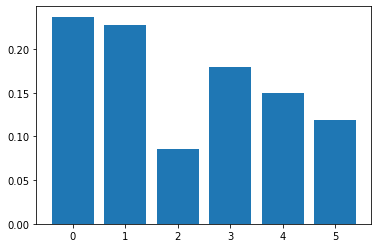

In [ ]:
importance_RF = RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_RF):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_RF))], importance_RF)
pyplot.show()

Мы видим, что в большей степени на результат классификации влияет размер операционной прибыли и инвестиций.
В меньшей степени влияют процентные выплаты.

#https://tproger.ru/translations/python-random-forest-implementation/
Random forest

Код со всякими графиками, разобраться

#Нейронная сеть

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)

In [ ]:
NN_pred = NN.predict(x_test)


In [ ]:
round(NN.score(x_test, y_test), 3)

0.897

In [ ]:
round(NN.score(x_train,y_train),8)

1.0

In [ ]:
print(NN_pred)

[3. 1. 2. 3. 2. 3. 3. 2. 2. 1. 2. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3.
 2. 3. 3. 1. 3.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(NN_pred, y_test))

0.896551724137931


In [ ]:
#Матрица неточности
print(confusion_matrix(NN_pred, y_test))

[[ 3  0  0]
 [ 0  6  1]
 [ 2  0 17]]


In [ ]:
#Отчет о классификации
print(classification_report(NN_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75         3
         2.0       1.00      0.86      0.92         7
         3.0       0.94      0.89      0.92        19

    accuracy                           0.90        29
   macro avg       0.85      0.92      0.86        29
weighted avg       0.92      0.90      0.90        29



In [ ]:
#Отчет о классификации для тренировочной выборки
NN_pred1 = NN.predict(x_train)
print(classification_report(NN_pred1, y_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        61

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



In [ ]:
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
nn.fit(X_train_std, y_train)

nn.predict_proba([X_test_std[0,:]])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([[1.02182419e-24, 1.13150281e-02, 9.88684972e-01]])

Интерпретация: модель предсказывает с шансом 99% принадлежность первой компании к третьему классу (Понци) и 1% ко второму классу (Спекулятивный) 







---



##Посмотрим влияние показателей

In [ ]:
f_nn = PermutationImportance(NN, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_nn)

Weight,Feature
-0.0425 ± 0.0235,x5
-0.0602 ± 0.0206,x2
-0.0867 ± 0.0071,x3
-0.0885 ± 0.0158,x4
-0.1239 ± 0.0404,x1
-0.1257 ± 0.0647,x0


In [ ]:
importance_nn=f_nn.feature_importances_

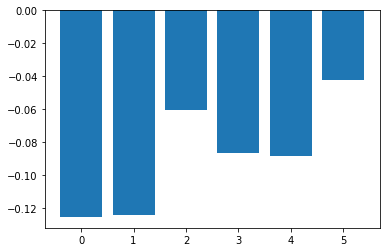

In [ ]:
pyplot.bar([x for x in range(len(importance_nn))], importance_nn)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

#Voting classifier
АНСАМБЛИ
разобраться, какие алгоритмы с какими весами лучше всего совмещать

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Decision Tree', tree_clf), ('Random Forest', RF)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The accuracy for DecisionTree and Random Forest is:',ensemble.score(x_test,y_test))

The accuracy for DecisionTree and Random Forest is: 0.6896551724137931


In [ ]:
VC_pred = ensemble.predict(x_test)
#Отчет о классификации
print(classification_report(VC_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.60      1.00      0.75         3
         2.0       0.50      0.43      0.46         7
         3.0       0.78      0.74      0.76        19

    accuracy                           0.69        29
   macro avg       0.63      0.72      0.66        29
weighted avg       0.69      0.69      0.68        29



In [ ]:
#Отчет о классификации для тренировочной выборки
VC_pred1 = ensemble.predict(x_train)

print(classification_report(VC_pred1, y_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        25
         2.0       1.00      1.00      1.00        27
         3.0       1.00      1.00      1.00        61

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



In [ ]:
ensemble.fit(X_train_std, y_train)

ensemble.predict_proba([X_test_std[0,:]])

array([[0.01666667, 0.82      , 0.16333333]])

Интерпретация: модель предсказывает с шансом 16% принадлежность первой компании к третьему классу (Понци), 82% ко второму классу (Спекулятивный) 







---



##Посмотрим влияние показателей

In [ ]:
f_vc = PermutationImportance(ensemble, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_vc)

Weight,Feature
0.0035 ± 0.0087,x3
0 ± 0.0000,x5
0 ± 0.0000,x2
0 ± 0.0000,x1
-0.0053 ± 0.0180,x4
-0.0088 ± 0.0388,x0


In [ ]:
importance_vc=f_vc.feature_importances_

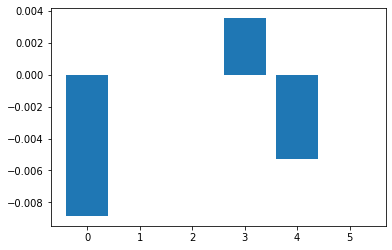

In [ ]:
pyplot.bar([x for x in range(len(importance_vc))], importance_vc)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли 

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble1=VotingClassifier(estimators=[('RF', RF), ('Logistic Regression', LR_clf), ('NB', NB_clf), ('knn', knn_clf), ('lda', LDA_clf) ], 
                       voting='soft', weights=[3,2,2,1,1]).fit(x_train,y_train)
print('The accuracy for DecisionTree and Random Forest is:',ensemble1.score(x_test,y_test))

The accuracy for DecisionTree and Random Forest is: 0.8620689655172413


In [ ]:
VC1_pred = ensemble1.predict(x_test)
#Отчет о классификации
print(classification_report(VC1_pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.83      0.91         6
         2.0       0.67      0.80      0.73         5
         3.0       0.89      0.89      0.89        18

    accuracy                           0.86        29
   macro avg       0.85      0.84      0.84        29
weighted avg       0.87      0.86      0.87        29



In [ ]:
#Отчет о классификации для тренировочной выборки
VC1_pred1 = ensemble1.predict(x_train)

print(classification_report(VC1_pred1, y_train))

              precision    recall  f1-score   support

         1.0       0.96      1.00      0.98        24
         2.0       1.00      0.93      0.96        29
         3.0       0.98      1.00      0.99        60

    accuracy                           0.98       113
   macro avg       0.98      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



In [ ]:
ensemble1.fit(X_train_std, y_train)

ensemble1.predict_proba([X_test_std[0,:]])

array([[0.07458619, 0.22039091, 0.7050229 ]])

Интерпретация: модель предсказывает с шансом 71% принадлежность первой компании к третьему классу (Понци), 22% ко второму классу (Спекулятивный) и 7% к первому классу (Хеджевый)







---



##Посмотрим влияние показателей

In [ ]:
f_vc1 = PermutationImportance(ensemble1, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_vc1)

Weight,Feature
0 ± 0.0000,x5
0 ± 0.0000,x2
-0.0071 ± 0.0071,x4
-0.0071 ± 0.0132,x3
-0.0124 ± 0.0212,x0
-0.0212 ± 0.0087,x1


In [ ]:
importance_vc1=f_vc1.feature_importances_

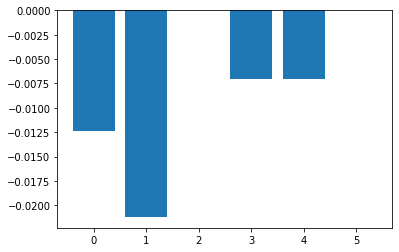

In [ ]:
pyplot.bar([x for x in range(len(importance_vc1))], importance_vc1)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

##XGboost - модель градиентного бустинга для задачи мультиклассификации

In [ ]:
y_train=y_train - 1
y_test = y_test - 1
xg_train = xgb.DMatrix(x_train, label=y_train)
xg_test = xgb.DMatrix(x_test, label=y_test)
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 3
param['nthread'] = 3
param['num_class'] = 3

In [ ]:
print(y_train)

[2. 2. 2. 2. 2. 1. 1. 1. 1. 0. 2. 2. 0. 2. 0. 2. 1. 2. 0. 2. 2. 2. 2. 1.
 0. 1. 1. 1. 1. 2. 2. 1. 0. 2. 2. 2. 1. 2. 1. 1. 1. 0. 0. 2. 2. 0. 2. 2.
 0. 1. 2. 2. 2. 1. 2. 0. 2. 2. 1. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 0. 2. 1.
 0. 0. 2. 2. 0. 1. 2. 1. 2. 1. 2. 0. 0. 2. 1. 2. 1. 0. 0. 1. 0. 2. 0. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 2. 0. 2.]


In [ ]:
print(y_test)

[2. 0. 1. 2. 1. 2. 2. 1. 2. 0. 1. 0. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 2. 0. 2.]


In [ ]:
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 3
bst = xgb.train(param, xg_train, num_round, watchlist)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != y_test) / y_test.shape[0]
print('Test error using softmax = {}'.format(error_rate))


[0]	train-merror:0.176991	test-merror:0.275862
[1]	train-merror:0.159292	test-merror:0.241379
[2]	train-merror:0.150442	test-merror:0.241379
Test error using softmax = 0.2413793103448276


In [ ]:
print(pred)

[2. 0. 1. 2. 1. 2. 2. 2. 2. 0. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 2. 0. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(pred, y_test))

0.7586206896551724


In [ ]:
#Матрица неточности
print(confusion_matrix(pred, y_test))

[[ 4  1  1]
 [ 0  2  1]
 [ 1  3 16]]


In [ ]:
#Отчет о классификации
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73         6
         1.0       0.33      0.67      0.44         3
         2.0       0.89      0.80      0.84        20

    accuracy                           0.76        29
   macro avg       0.67      0.71      0.67        29
weighted avg       0.81      0.76      0.78        29



In [ ]:
#Отчет о классификации для тренировочной выборки
pred1 = bst.predict(xg_train)

print(classification_report(pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.86      0.91        28
         1.0       0.85      0.72      0.78        32
         2.0       0.80      0.92      0.86        53

    accuracy                           0.85       113
   macro avg       0.87      0.83      0.85       113
weighted avg       0.86      0.85      0.85       113



#Bagging методы
 
1.   BAGGING - DT
2.   BAGGING - KNN
3.   BAGGING - SVM
4.   BAGGING - NB
5.   BAGGING - LR



In [ ]:
Bagknn = BaggingClassifier(base_estimator=knn_clf).fit(x_train, y_train)

In [ ]:
Bagknn_pred = Bagknn.predict(x_test)


In [ ]:
round(Bagknn.score(x_test, y_test), 4)

0.7241

In [ ]:
print(Bagknn_pred)

[2. 0. 1. 2. 2. 2. 2. 0. 2. 0. 0. 0. 2. 0. 0. 2. 2. 1. 2. 2. 2. 2. 2. 2.
 1. 0. 0. 0. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(Bagknn_pred, y_test))

0.7241379310344828


In [ ]:
#Матрица неточности
print(confusion_matrix(Bagknn_pred, y_test))

[[ 5  2  3]
 [ 0  2  1]
 [ 0  2 14]]


In [ ]:
#Отчет о классификации
print(classification_report(Bagknn_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67        10
         1.0       0.33      0.67      0.44         3
         2.0       0.78      0.88      0.82        16

    accuracy                           0.72        29
   macro avg       0.70      0.68      0.64        29
weighted avg       0.81      0.72      0.73        29



In [ ]:
#Отчет о классификации для тренировочной выборки
Bagknn_pred1 = Bagknn.predict(x_train)

print(classification_report(Bagknn_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81        27
         1.0       0.63      0.77      0.69        22
         2.0       0.85      0.81      0.83        64

    accuracy                           0.80       113
   macro avg       0.77      0.79      0.78       113
weighted avg       0.81      0.80      0.80       113



In [ ]:
Bagknn.fit(X_train_std, y_train)

Bagknn.predict_proba([X_test_std[0,:]])

array([[0.175, 0.05 , 0.775]])

Интерпретация: модель предсказывает с шансом 95% принадлежность первой компании к третьему классу (Понци), 2.5% ко второму классу (Спекулятивный) и 2.5% к первому классу (Хеджевый)







---



##Посмотрим влияние показателей

In [ ]:
f_Bagknn = PermutationImportance(Bagknn, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_Bagknn)

Weight,Feature
0.1044 ± 0.0746,x1
0.0619 ± 0.0845,x3
0.0425 ± 0.0439,x0
0.0301 ± 0.0309,x5
0.0301 ± 0.0240,x4
0.0018 ± 0.0206,x2


In [ ]:
importance_Bagknn=f_Bagknn.feature_importances_

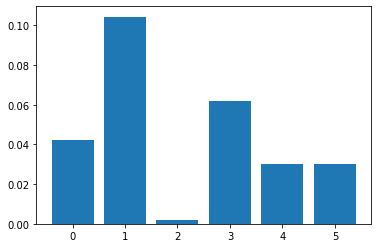

In [ ]:
pyplot.bar([x for x in range(len(importance_Bagknn))], importance_Bagknn)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры и инвестиций и чистого дохода, наим - проц выплаты

In [ ]:
Bagtree = BaggingClassifier(base_estimator=tree_clf).fit(x_train, y_train)

In [ ]:
Bagtree_pred = Bagtree.predict(x_test)


In [ ]:
round(Bagtree.score(x_test, y_test), 4)

0.7586

In [ ]:
print(Bagtree_pred)

[2. 0. 1. 1. 1. 2. 2. 2. 2. 0. 2. 0. 2. 0. 0. 1. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 0. 1.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(Bagtree_pred, y_test))

0.7586206896551724


In [ ]:
#Матрица неточности
print(confusion_matrix(Bagtree_pred, y_test))

[[ 5  0  1]
 [ 0  3  3]
 [ 0  3 14]]


In [ ]:
#Отчет о классификации
print(classification_report(Bagtree_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91         6
         1.0       0.50      0.50      0.50         6
         2.0       0.78      0.82      0.80        17

    accuracy                           0.76        29
   macro avg       0.76      0.72      0.74        29
weighted avg       0.77      0.76      0.76        29



In [ ]:
#Отчет о классификации для тренировочной выборки
Bagtree_pred1 = Bagtree.predict(x_train)

print(classification_report(Bagtree_pred1, y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       1.00      1.00      1.00        27
         2.0       0.98      1.00      0.99        60

    accuracy                           0.99       113
   macro avg       0.99      0.99      0.99       113
weighted avg       0.99      0.99      0.99       113



In [ ]:
Bagtree.fit(X_train_std, y_train)

Bagtree.predict_proba([X_test_std[0,:]])

array([[0. , 0.4, 0.6]])

Интерпретация: модель предсказывает с шансом 30% принадлежность первой компании к третьему классу (Понци) и 70% ко второму классу (Спекулятивный)






---



##Посмотрим влияние показателей

In [ ]:
f_Bagtree = PermutationImportance(Bagtree, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_Bagtree)

Weight,Feature
0.0584 ± 0.0381,x0
0.0088 ± 0.0224,x1
0 ± 0.0000,x5
-0.0159 ± 0.0343,x4
-0.0319 ± 0.0483,x2
-0.0336 ± 0.0361,x3


In [ ]:
importance_Bagtree=f_Bagtree.feature_importances_

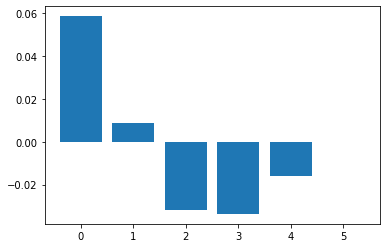

In [ ]:
pyplot.bar([x for x in range(len(importance_Bagtree))], importance_Bagtree)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

In [ ]:
Bagsvm = BaggingClassifier(base_estimator=svm)

In [ ]:
Bagsvm_pred = Bagsvm.fit(x_train, y_train).predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
round(Bagsvm.score(x_test, y_test), 4)

0.7931

In [ ]:
print(Bagsvm_pred)

[2. 0. 1. 2. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 2. 2.
 2. 2. 2. 0. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(Bagsvm_pred, y_test))

0.7931034482758621


In [ ]:
#Матрица неточности
print(confusion_matrix(Bagsvm_pred, y_test))

[[ 4  0  0]
 [ 0  2  1]
 [ 1  4 17]]


In [ ]:
#Отчет о классификации
print(classification_report(Bagsvm_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.33      0.67      0.44         3
         2.0       0.94      0.77      0.85        22

    accuracy                           0.79        29
   macro avg       0.69      0.81      0.73        29
weighted avg       0.86      0.79      0.81        29



In [ ]:
#Отчет о классификации для тренировочной выборки
Bagsvm_pred1 = Bagsvm.predict(x_train)

print(classification_report(Bagsvm_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72        22
         1.0       0.33      0.82      0.47        11
         2.0       0.92      0.70      0.79        80

    accuracy                           0.73       113
   macro avg       0.64      0.76      0.66       113
weighted avg       0.81      0.73      0.75       113



In [ ]:
Bagsvm.fit(X_train_std, y_train)

Bagsvm.predict_proba([X_test_std[0,:]])

array([[0. , 0.1, 0.9]])

Интерпретация: модель предсказывает с шансом 90% принадлежность первой компании к третьему классу (Понци)







---



##Посмотрим влияние показателей

In [ ]:
f_svm = PermutationImportance(svm, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_svm)

Weight,Feature
-0.0018 ± 0.0071,x2
-0.0053 ± 0.0180,x5
-0.0354 ± 0.0158,x4
-0.0496 ± 0.0364,x0
-0.0549 ± 0.0586,x3
-0.0761 ± 0.0142,x1


In [ ]:
importance_svm=f_svm.feature_importances_

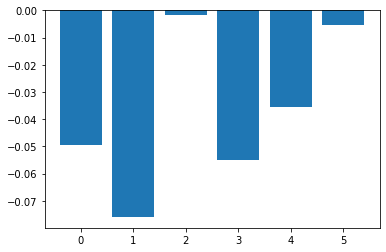

In [ ]:
pyplot.bar([x for x in range(len(importance_svm))], importance_svm)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли и инвестиций

In [ ]:
BagNB = BaggingClassifier(base_estimator=NB_clf).fit(x_train, y_train)

In [ ]:
BagNB_pred = BagNB.predict(x_test)


In [ ]:
round(BagNB.score(x_test, y_test), 4)

0.4138

In [ ]:
print(BagNB_pred)

[2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 0. 0. 1. 0. 1. 2. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(BagNB_pred, y_test))

0.41379310344827586


In [ ]:
#Матрица неточности
print(confusion_matrix(BagNB_pred, y_test))

[[ 2  0  2]
 [ 3  6 12]
 [ 0  0  4]]


In [ ]:
#Отчет о классификации
print(classification_report(BagNB_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.40      0.50      0.44         4
         1.0       1.00      0.29      0.44        21
         2.0       0.22      1.00      0.36         4

    accuracy                           0.41        29
   macro avg       0.54      0.60      0.42        29
weighted avg       0.81      0.41      0.43        29



In [ ]:
#Отчет о классификации для тренировочной выборки
BagNB_pred1 = BagNB.predict(x_train)

print(classification_report(BagNB_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.20      0.71      0.31         7
         1.0       0.93      0.27      0.42        92
         2.0       0.18      0.79      0.29        14

    accuracy                           0.36       113
   macro avg       0.44      0.59      0.34       113
weighted avg       0.79      0.36      0.40       113



In [ ]:
BagNB.fit(X_train_std, y_train)

BagNB.predict_proba([X_test_std[0,:]])

array([[4.01081937e-12, 4.16991852e-10, 1.00000000e+00]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании к третьему классу (Понци)






---



##Посмотрим влияние показателей

In [ ]:
f_BagNB = PermutationImportance(BagNB, random_state=0).fit(x_train, y_train)
eli5.show_weights(f_BagNB)

Weight,Feature
0.0177 ± 0.0194,x0
0.0124 ± 0.0087,x5
0.0053 ± 0.0087,x4
0.0035 ± 0.0087,x3
0 ± 0.0000,x2
0.0000 ± 0.0224,x1


In [ ]:
importance_BagNB=f_BagNB.feature_importances_

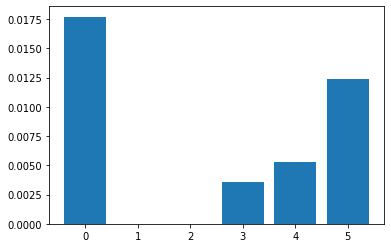

In [ ]:
pyplot.bar([x for x in range(len(importance_BagNB))], importance_BagNB)
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры операционной прибыли 

In [ ]:
BagLR = BaggingClassifier(base_estimator=LR_clf).fit(x_train, y_train)

In [ ]:
BagLR_pred = BagLR.predict(x_test)


In [ ]:
round(BagLR.score(x_test, y_test), 4)

0.7586

In [ ]:
print(BagLR_pred)

[2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(BagLR_pred, y_test))

0.7586206896551724


In [ ]:
#Матрица неточности
print(confusion_matrix(BagLR_pred, y_test))

[[ 3  0  0]
 [ 0  1  0]
 [ 2  5 18]]


In [ ]:
#Отчет о классификации
print(classification_report(BagLR_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.17      1.00      0.29         1
         2.0       1.00      0.72      0.84        25

    accuracy                           0.76        29
   macro avg       0.59      0.91      0.62        29
weighted avg       0.93      0.76      0.81        29



In [ ]:
#Отчет о классификации для тренировочной выборки
BagLR_pred1 = BagLR.predict(x_train)

print(classification_report(BagLR_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.56      0.78      0.65        18
         1.0       0.22      0.86      0.35         7
         2.0       0.92      0.64      0.75        88

    accuracy                           0.67       113
   macro avg       0.57      0.76      0.59       113
weighted avg       0.82      0.67      0.71       113



In [ ]:
BagLR.fit(X_train_std, y_train)

BagLR.predict_proba([X_test_std[0,:]])

array([[0.16560056, 0.19988019, 0.63451925]])

Интерпретация: модель предсказывает с шансом 63% принадлежность первой компании к третьему классу (Понци), 20% ко второму классу (Спекулятивный) и 17% к первому классу (Хеджевый)







---



##Посмотрим влияние показателей

In [ ]:
f_BagLR = PermutationImportance(BagLR , random_state=0).fit(x_train, y_train)
eli5.show_weights(f_BagLR )

Weight,Feature
0.0389 ± 0.0142,x1
0.0319 ± 0.0508,x3
0.0265 ± 0.0336,x4
0.0212 ± 0.0142,x0
0.0088 ± 0.0112,x2
-0.0106 ± 0.0260,x5


In [ ]:
importance_BagLR =f_BagLR .feature_importances_

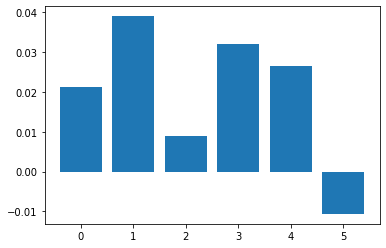

In [ ]:
pyplot.bar([x for x in range(len(importance_BagLR ))], importance_BagLR )
pyplot.show()

Мы видим, что наибольшее влияние на классификацию оказывают размеры инвестиций

In [ ]:
adatree=AdaBoostClassifier(base_estimator=tree_clf).fit(x_train,y_train)

In [ ]:
adatree_pred = adatree.predict(x_test)


In [ ]:
round(adatree.score(x_test, y_test), 4)

0.7586

In [ ]:
print(adatree_pred)

[2. 0. 1. 2. 1. 2. 2. 1. 1. 2. 2. 0. 2. 2. 0. 1. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 2. 2. 1.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(adatree_pred, y_test))

0.7586206896551724


In [ ]:
#Матрица неточности
print(confusion_matrix(adatree_pred, y_test))

[[ 3  0  0]
 [ 0  4  3]
 [ 2  2 15]]


In [ ]:
#Отчет о классификации
print(classification_report(adatree_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.67      0.57      0.62         7
         2.0       0.83      0.79      0.81        19

    accuracy                           0.76        29
   macro avg       0.70      0.79      0.73        29
weighted avg       0.77      0.76      0.76        29



In [ ]:
#Отчет о классификации для тренировочной выборки
adatree_pred1 = adatree.predict(x_train)

print(classification_report(adatree_pred1, y_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       1.00      1.00      1.00        27
         2.0       1.00      1.00      1.00        61

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



In [ ]:
adatree.fit(X_train_std, y_train)

adatree.predict_proba([X_test_std[0,:]])

array([[2.22044605e-16, 1.00000000e+00, 2.22044605e-16]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании к третьему классу (Понци)







---



Feature: 0, Score: 0.29017
Feature: 1, Score: 0.24774
Feature: 2, Score: 0.05608
Feature: 3, Score: 0.13601
Feature: 4, Score: 0.13913
Feature: 5, Score: 0.13087


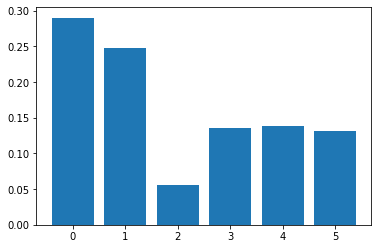

In [ ]:
importance_adatree = adatree .feature_importances_
# summarize feature importance
for i,v in enumerate(importance_adatree ):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_adatree ))], importance_adatree )
pyplot.show()

Мы видим, что в большей степени на результат классификации влияет размер операционной прибыли и инвестиций.
В меньшей степени влияют процентные выплаты.

In [ ]:
adaNB=AdaBoostClassifier(base_estimator=NB_clf).fit(x_train,y_train)

In [ ]:
adaNB_pred = adaNB.predict(x_test)


In [ ]:
round(adaNB.score(x_test, y_test), 4)

0.5517

In [ ]:
print(adaNB_pred)

[2. 0. 1. 1. 1. 1. 2. 2. 2. 0. 2. 2. 2. 0. 0. 2. 2. 1. 1. 1. 2. 1. 1. 2.
 1. 2. 2. 0. 0.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(adaNB_pred, y_test))

0.5517241379310345


In [ ]:
#Матрица неточности
print(confusion_matrix(adaNB_pred, y_test))

[[4 0 2]
 [0 3 7]
 [1 3 9]]


In [ ]:
#Отчет о классификации
print(classification_report(adaNB_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73         6
         1.0       0.50      0.30      0.37        10
         2.0       0.50      0.69      0.58        13

    accuracy                           0.55        29
   macro avg       0.60      0.55      0.56        29
weighted avg       0.56      0.55      0.54        29



In [ ]:
#Отчет о классификации для тренировочной выборки
adaNB_pred1 = adaNB.predict(x_train)

print(classification_report(adaNB_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.56      0.82      0.67        17
         1.0       0.93      0.52      0.67        48
         2.0       0.57      0.73      0.64        48

    accuracy                           0.65       113
   macro avg       0.69      0.69      0.66       113
weighted avg       0.72      0.65      0.66       113



In [ ]:
adaNB.fit(X_train_std, y_train)

adaNB.predict_proba([X_test_std[0,:]])

array([[3.13839715e-05, 2.61941277e-04, 9.99706675e-01]])

Интерпретация: модель предсказывает с шансом 100% принадлежность первой компании к третьему классу (Понци)







---



In [ ]:
from sklearn.svm import SVC

In [ ]:
adasvm=AdaBoostClassifier(svm.SVC(probability=True,kernel='linear'),n_estimators=50, learning_rate=1.0, algorithm='SAMME')

AttributeError: ignored

In [ ]:
adasvm_pred = adasvm.fit(x_train, y_train).predict(x_test)


NameError: ignored

In [ ]:
adasvm_pred = adasvm.predict(x_test)


In [ ]:
round(adasvm.score(x_test, y_test), 4)

0.6552

In [ ]:
print(adasvm_pred)

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(adasvm_pred, y_test))

0.6551724137931034


In [ ]:
#Матрица неточности
print(confusion_matrix(adasvm_pred, y_test))

[[ 1  0  0]
 [ 0  0  0]
 [ 4  6 18]]


In [ ]:
#Отчет о классификации
print(classification_report(adasvm_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33         1
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.64      0.78        28

    accuracy                           0.66        29
   macro avg       0.40      0.55      0.37        29
weighted avg       0.97      0.66      0.77        29



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Отчет о классификации для тренировочной выборки
adasvm_pred1 = adasvm.predict(x_train)

print(classification_report(adasvm_pred1, y_train))

              precision    recall  f1-score   support

         0.0       0.12      1.00      0.21         3
         1.0       0.04      1.00      0.07         1
         2.0       1.00      0.56      0.72       109

    accuracy                           0.58       113
   macro avg       0.39      0.85      0.33       113
weighted avg       0.97      0.58      0.70       113



In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(class_weight='balanced', max_iter=100,  multi_class='multinomial')
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
round(clf.score(x_test, y_test), 4)

1.0

In [ ]:
print(clf_pred)

[2. 0. 1. 2. 1. 2. 2. 1. 2. 0. 1. 0. 2. 2. 0. 1. 2. 2. 2. 2. 2. 2. 2. 2.
 1. 2. 2. 0. 2.]


In [ ]:
#Оценим точность классификатора
print(accuracy_score(clf_pred, y_test))

1.0


In [ ]:
#Матрица неточности
print(confusion_matrix(clf_pred, y_test))

[[ 5  0  0]
 [ 0  6  0]
 [ 0  0 18]]


In [ ]:
#Отчет о классификации
print(classification_report(clf_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5
         1.0       1.00      1.00      1.00         6
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [ ]:
#Отчет о классификации для тренировочной выборки
clf_pred1 = clf.predict(x_train)

print(classification_report(clf_pred1, y_train))

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        30
         1.0       0.96      0.90      0.93        29
         2.0       0.87      0.98      0.92        54

    accuracy                           0.92       113
   macro avg       0.94      0.90      0.92       113
weighted avg       0.93      0.92      0.92       113



#График сравнения моделей

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.637879 (0.168883)
LDA: 0.583333 (0.160349)
KNN: 0.648485 (0.141170)
CART: 0.563636 (0.109898)
NB: 0.351515 (0.101368)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.656818 (0.120455)


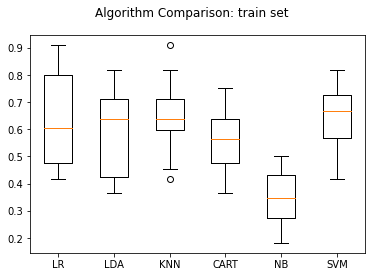

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('LR', LR_clf))
models.append(('LDA', LDA_clf))
models.append(('KNN', knn_clf))
models.append(('CART', tree_clf))
models.append(('NB', NB_clf))
models.append(('SVM', svm))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: train set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.716667 (0.211476)
LDA: 0.616667 (0.236291)
KNN: 0.516667 (0.216667)
CART: 0.433333 (0.260342)
NB: 0.350000 (0.216667)
SVM: 0.716667 (0.211476)


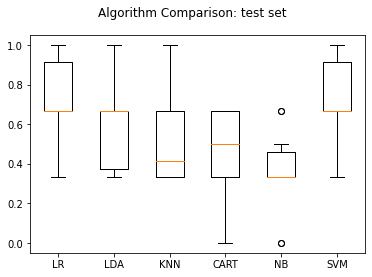

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('LR', LR_clf))
models.append(('LDA', LDA_clf))
models.append(('KNN', knn_clf))
models.append(('CART', tree_clf))
models.append(('NB', NB_clf))
models.append(('SVM', svm))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: test set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.690152 (0.140732)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


VotCl1: 0.563636 (0.109898)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


VotCl2: 0.653788 (0.112879)
adaDT: 0.598485 (0.142295)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packag

NN: 0.842424 (0.083526)
adaNB: 0.521212 (0.124933)


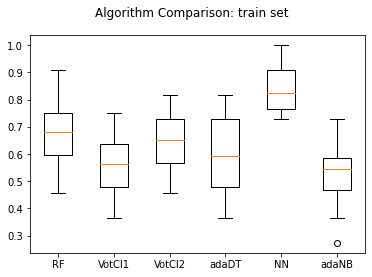

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('RF', RF))
models.append(('VotCl1', ensemble))
models.append(('VotCl2', ensemble1))
models.append(('adaDT', adatree))
models.append(('NN', NN))
models.append(('adaNB', adaNB))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: train set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.650000 (0.216667)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


VotCl1: 0.500000 (0.307318)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


VotCl2: 0.483333 (0.157233)
adaDT: 0.500000 (0.307318)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NN: 0.666667 (0.210819)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


adaNB: 0.366667 (0.314466)


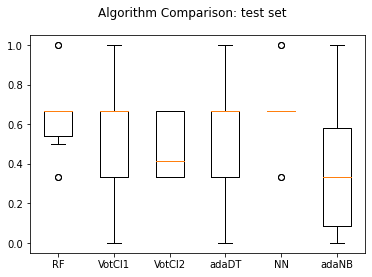

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('RF', RF))
models.append(('VotCl1', ensemble))
models.append(('VotCl2', ensemble1))
models.append(('adaDT', adatree))
models.append(('NN', NN))
models.append(('adaNB', adaNB))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: test set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BagDT: 0.653030 (0.127210)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Bagsvm: 0.702273 (0.166358)
Bagknn: 0.656818 (0.112216)
BagNB: 0.352273 (0.088817)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BagLR: 0.637879 (0.158795)


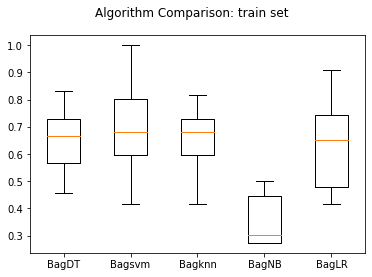

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('BagDT', Bagtree))
models.append(('Bagsvm', Bagsvm))
models.append(('Bagknn', Bagknn))
models.append(('BagNB', BagNB))
models.append(('BagLR', BagLR))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: train set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/skl

BagDT: 0.650000 (0.157233)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Bagsvm: 0.683333 (0.189297)
Bagknn: 0.550000 (0.258736)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ZeroDivisionError: Weights sum to zero, can't be normalized

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect sinc

BagNB: nan (nan)
BagLR: 0.683333 (0.240947)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


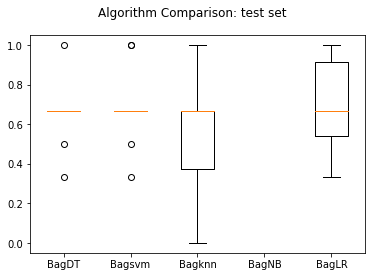

In [ ]:
from sklearn import model_selection
import matplotlib.pyplot as plt
seed = 7
models = []
models.append(('BagDT', Bagtree))
models.append(('Bagsvm', Bagsvm))
models.append(('Bagknn', Bagknn))
models.append(('BagNB', BagNB))
models.append(('BagLR', BagLR))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, x_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison: test set')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()